# Stepping through the basic processessing of increment widths

## importing and setting up some basic things we will use

In [235]:
import pandas as pd
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
import scipy.stats
pd.set_option('display.max_rows', 20)



## generate and save a sample timeseries as a text file

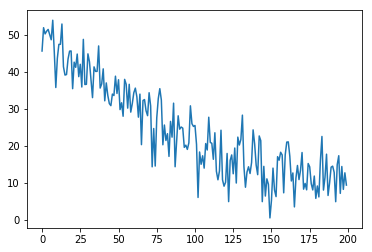

In [111]:
series1 = np.array([np.power(200-i,2) for i in range(200)])*1.0e-3
series2 = [gauss(0.0, 5.0) for i in range(200)]
series = series1 + series2
series -= np.min(series)
series += 0.5
plt.plot(series)

In [112]:
df = pd.DataFrame(series)
df.to_csv('example_shell_data.csv', float_format='%.2f', na_rep="NAN!")


## Read your data file in (as an example, I'm just re-reading in the file we just produced)

In [125]:
df = pd.read_csv('example_bivalve_increments_laura.csv')
# Note here I'm skipping the 1st row because my file had no headers, and I'm adding thee manually. You could just make sure your file matches the format of 'example_shell_data.csv or make changes to this line of code


In [175]:
my_dict = {}

for (columnName, columnData) in df.iteritems():
    my_dict[columnName] = pd.DataFrame(columns=['raw_data'])
    my_dict[columnName].raw_data = columnData
    my_dict[columnName].dropna(axis='rows',inplace=True)
    my_dict[columnName]['LogValues'] = np.log10(my_dict[columnName].raw_data)
    my_dict[columnName]['Spline'] = interpolate.UnivariateSpline(my_dict[columnName].index, my_dict[columnName]['LogValues'], k=3)(my_dict[columnName].index)
    my_dict[columnName]['Processed'] = my_dict[columnName]['LogValues'] - my_dict[columnName]['Spline']



## Saving out the data

In [119]:
df.to_csv('processed_shell_data.csv', float_format='%.2f', na_rep="NAN!")
# Note that you will want to change the name 'processed_shell_data.csv' to whatever you want to save that file as


Pearson corr:  0.704087442753 p-value:  0.000367567643425


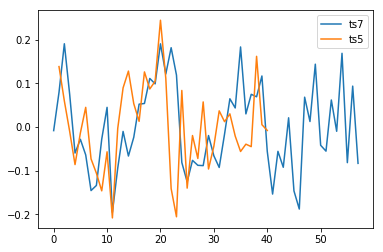

In [400]:
def sliding_correlation(x1,x2):
    window_length = 21
    length_x1 = len(x1)
    length_x2 = len(x2)
    output = np.zeros([length_x1-window_length,length_x2-window_length])
    p_out = np.zeros([length_x1-window_length,length_x2-window_length])
    if (length_x2 > window_length) & (length_x1 > window_length):
        for i in range(length_x1-window_length):
            for j in range(length_x2-window_length):
                corr_values = scipy.stats.pearsonr(x1[i:i+window_length], x2[j:j+window_length])
                cc = corr_values[0]
                p = corr_values[1]
                output[i,j] = cc
                p_out[i,j] = p
        x1_max = np.max(output[0,:])
        loc_x1_max = np.where(output[0,:] == x1_max)
        x2_max = np.max(output[:,0])
        loc_x2_max = np.where(output[:,0] == x2_max)
        if x1_max > x2_max:
            return [loc_x1_max[0][0],0],x1_max,p_out[0,loc_x1_max[0][0]]
        else:
            return [0,loc_x2_max[0][0]],x2_max,p_out[loc_x2_max[0][0],0]

    

a = 'ts7'
b = 'ts5'

shift_array1 = np.zeros([len(my_dict),len(my_dict)])
shift_array2 = np.zeros([len(my_dict),len(my_dict)])
corr_array1 = np.zeros([len(my_dict),len(my_dict)])

for i,key1 in enumerate(my_dict):
    for j,key2 in enumerate(my_dict):
        shift,max_corr,p_value = sliding_correlation(my_dict[key1].Processed,my_dict[key2].Processed)
        shift_array1[i,j] = shift[0]
        shift_array1[i,j] = shift[1]
        corr_array1[i,j] = max_corr

shift,max_corr,p_value = sliding_correlation(my_dict[a].Processed,my_dict[b].Processed)
print 'Pearson corr: ',max_corr,'p-value: ',p_value

plt.plot(np.arange(len(my_dict[a].Processed))+shift[0],my_dict[a].Processed,label= a)
plt.plot(np.arange(len(my_dict[b].Processed))+shift[1],my_dict[b].Processed,label= b)
plt.legend()
plt.show()


[ 0.74900135  0.63909749  0.75542053  0.76881528  0.70408744  0.6887073
  0.63630014  0.76881528]


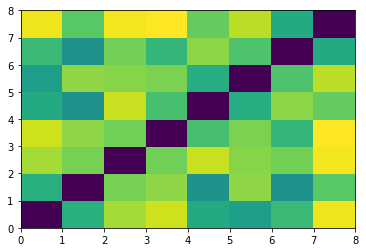

In [412]:
np.fill_diagonal(corr_array1, 0)
plt.pcolormesh(corr_array1)
max_vals = np.max(corr_array1,axis = 1)
print max_vals

max_val_locs = [np.where(corr_array1[i,:] == max_vals[i])[0][0] for i in range(len(my_dict))]

In [413]:
max_val_locs


[7, 5, 7, 7, 2, 7, 4, 3]

In [198]:
np.arange(len(my_dict['ts2'].Processed))+2.0

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.])